**T074 Kermeen**

**Prac 7**

**Logistic Regression and Decision Tree**
*  Build a logistic regression model to predict a binary outcome.
*  Evaluate the model's performance using classification metrics (e.g., accuracy,precision, recall).
*  Construct a decision tree model and interpret the decision rules for classification.

A. Logistic Regression

In [1]:
import pandas as pd
df = pd.read_csv("/content/Sales_with_NaNs_v1.3.csv")
df.head()

,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
0,Control,High Value,240.548359,300.007568,74.684767,NaN,No
1,Treatment,High Value,246.862114,381.337555,100.000000,100.000000,Yes
2,Control,High Value,156.978084,179.330464,98.780735,100.000000,No
3,Control,Medium Value,192.126708,229.278031,49.333766,39.811841,Yes
4,NaN,High Value,229.685623,NaN,83.974852,87.738591,Yes


In [2]:
df["target"] = df["Purchase_Made"].map({"Yes": 1, "No": 0})
X = df.select_dtypes(include='number').drop("target", axis=1)
y = df["target"]

In [3]:
#splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
import numpy as np

# Impute missing values for X
imputer_X = SimpleImputer(strategy='median')
X_train = imputer_X.fit_transform(X_train)
X_test = imputer_X.transform(X_test)

# Impute missing values for y
imputer_y = SimpleImputer(strategy='median') # Using median for target as well
y_train = imputer_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test = imputer_y.transform(y_test.values.reshape(-1, 1)).ravel()

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
print("Predicted Test Results : ",y_pred)
print("~"*20)

Predicted Test Results :  [1. 1. 1. ... 1. 1. 1.]
~~~~~~~~~~~~~~~~~~~~


In [6]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[   2, 1149],
       [   5, 1344]])

Text(0.5, 25.722222222222214, 'Predicted label')

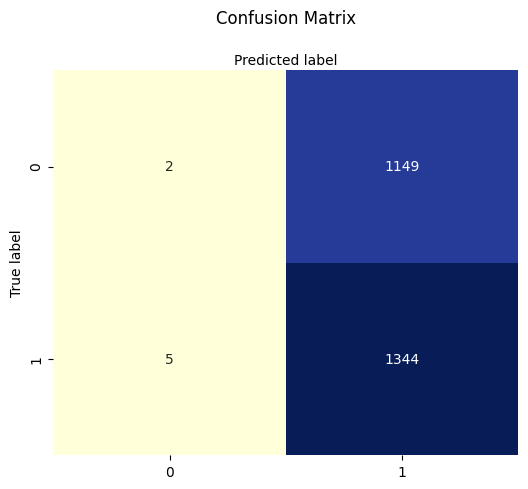

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Replace with the meaning of your target
class_names = ['Class 0', 'Class 1']   # ← change to your actual labels

fig, ax = plt.subplots(figsize=(6, 5))

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(
    pd.DataFrame(cnf_matrix),
    annot=True,
    cmap="YlGnBu",
    fmt='g',
    cbar=False
)

ax.xaxis.set_label_position("top")
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [10]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='weighted'))
print("F1-Score:", metrics.f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.5384
Precision: 0.4224463469142169
Recall: 0.5384
F1-Score: 0.37911370139508876


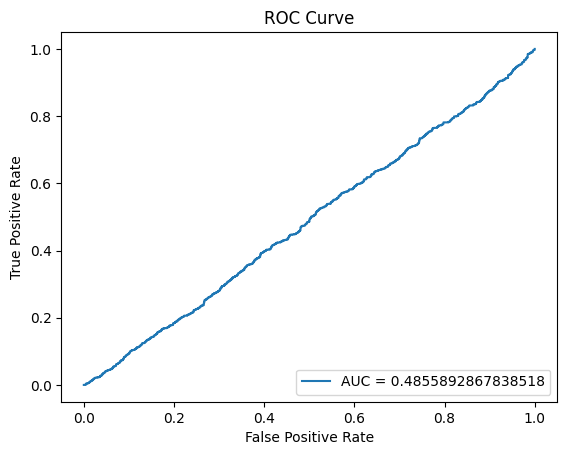

In [11]:
# ROC Curve
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="AUC = " + str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc=4)
plt.show()

B. Decision Tree

In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [13]:
df = pd. read_csv('/content/Sales_with_NaNs_v1.3.csv')
df.head()

,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
0,Control,High Value,240.548359,300.007568,74.684767,NaN,No
1,Treatment,High Value,246.862114,381.337555,100.000000,100.000000,Yes
2,Control,High Value,156.978084,179.330464,98.780735,100.000000,No
3,Control,Medium Value,192.126708,229.278031,49.333766,39.811841,Yes
4,NaN,High Value,229.685623,NaN,83.974852,87.738591,Yes


In [14]:
df.isnull().sum()

,0
Group,1401
Customer_Segment,1966
Sales_Before,1522
Sales_After,767
Customer_Satisfaction_Before,1670
Customer_Satisfaction_After,1640
Purchase_Made,805


In [15]:
df = df.dropna()

In [17]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_cols)
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = le    # save encoder if you need inverse_transform later

print(df.head())


Categorical columns: Index(['Customer_Segment', 'Purchase_Made'], dtype='object')
   Group  Customer_Segment  Sales_Before  Sales_After  \
1      1                 0    246.862114   381.337555   
2      0                 0    156.978084   179.330464   
3      0                 2    192.126708   229.278031   
6      0                 0    191.713918   222.409356   
9      1                 0    235.071493   352.756872   

   Customer_Satisfaction_Before  Customer_Satisfaction_After  Purchase_Made  
1                    100.000000                   100.000000              1  
2                     98.780735                   100.000000              0  
3                     49.333766                    39.811841              1  
6                     89.967827                    85.120975              1  
9                     72.919851                    70.753225              0  


In [21]:
y = df["Purchase_Made"]
X = df.drop(["Purchase_Made"], axis=1)

In [22]:
# Split dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
# Initialize and train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
# Make predictions
y_pred = clf.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score
# Accuracy on training set
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)
# Accuracy on test set
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 1.0
Test Accuracy: 0.5314787701317716


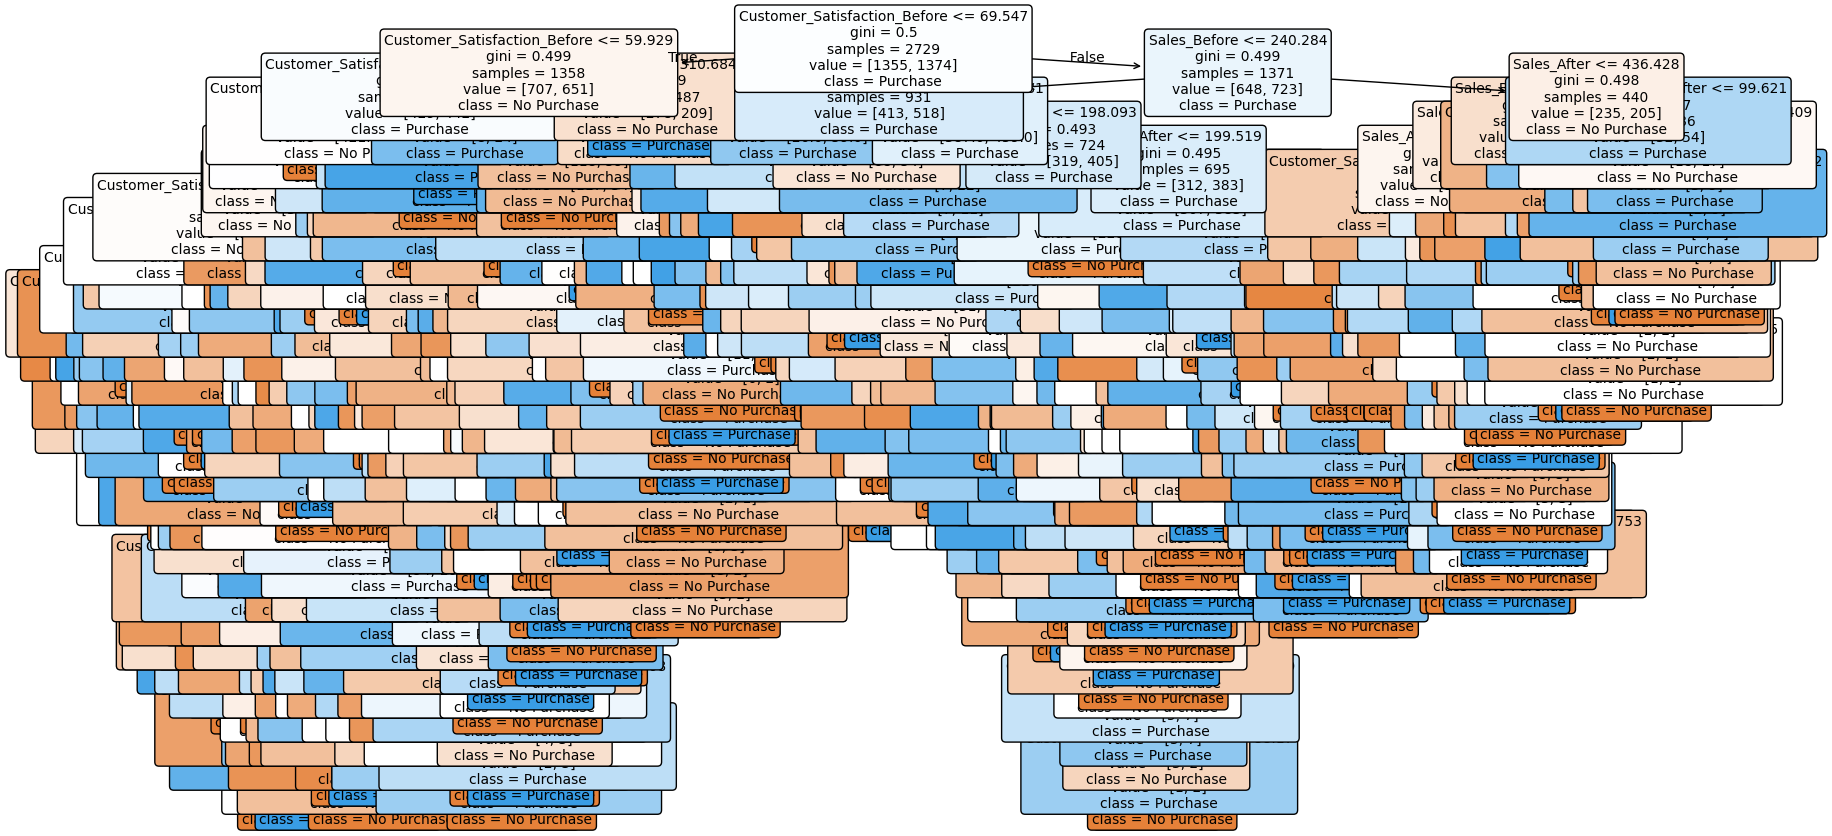

In [24]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(
    clf,
    feature_names=X.columns,
    class_names=['No Purchase', 'Purchase'],
    filled=True,
    rounded=True,
    fontsize=10)
plt.show()

=== Training Set Evaluation ===
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1355
           1       1.00      1.00      1.00      1374

    accuracy                           1.00      2729
   macro avg       1.00      1.00      1.00      2729
weighted avg       1.00      1.00      1.00      2729



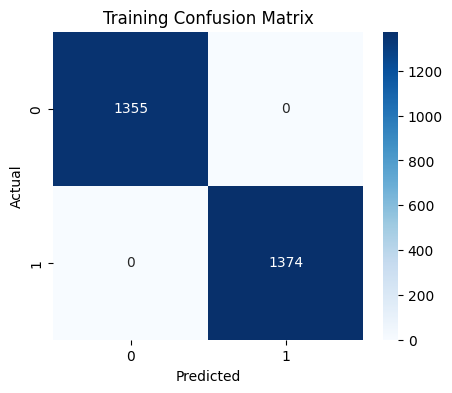


=== Testing Set Evaluation ===
Accuracy: 0.5314787701317716
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.54      0.53       339
           1       0.54      0.52      0.53       344

    accuracy                           0.53       683
   macro avg       0.53      0.53      0.53       683
weighted avg       0.53      0.53      0.53       683



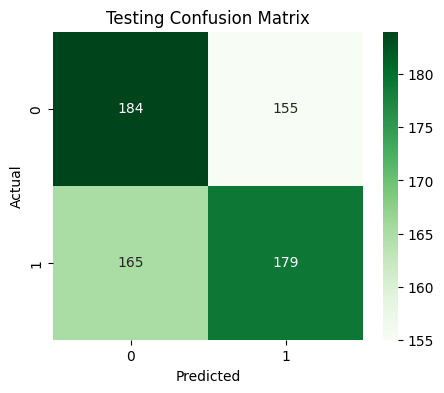

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Predict on training set
y_train_pred = clf.predict(X_train)

# Predict on testing set
y_test_pred = clf.predict(X_test)

# --- Training Evaluation ---
print("=== Training Set Evaluation ===")
train_acc = accuracy_score(y_train, y_train_pred)
print("Accuracy:", train_acc)
print("Classification Report:\n", classification_report(y_train, y_train_pred))

# Confusion matrix for training
cm_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title("Training Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- Testing Evaluation ---
print("\n=== Testing Set Evaluation ===")
test_acc = accuracy_score(y_test, y_test_pred)
print("Accuracy:", test_acc)
print("Classification Report:\n", classification_report(y_test, y_test_pred))

# Confusion matrix for testing
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens')
plt.title("Testing Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Training ROC-AUC: 1.0
Testing ROC-AUC: 0.5315608492831173


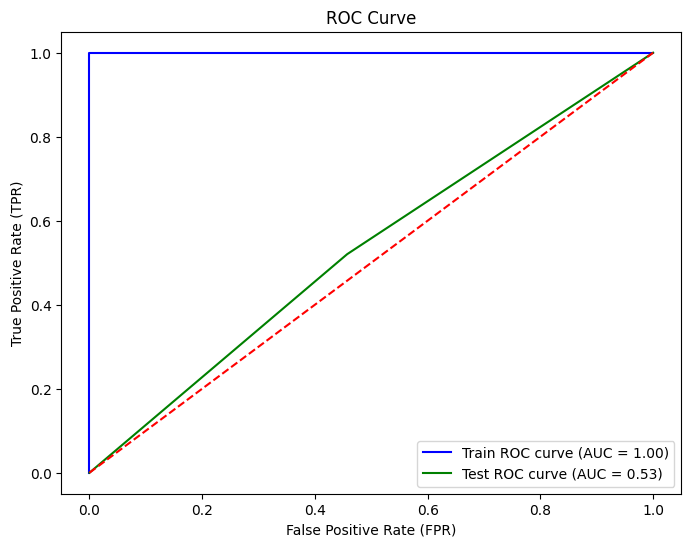

In [26]:
#finding true positive rate and false positive rate
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_train_prob = clf.predict_proba(X_train)[:, 1]
y_test_prob = clf.predict_proba(X_test)[:, 1]

# Compute FPR, TPR for training set
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)

# Compute FPR, TPR for testing set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Print AUC
print("Training ROC-AUC:", roc_auc_train)
print("Testing ROC-AUC:", roc_auc_test)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='green', label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

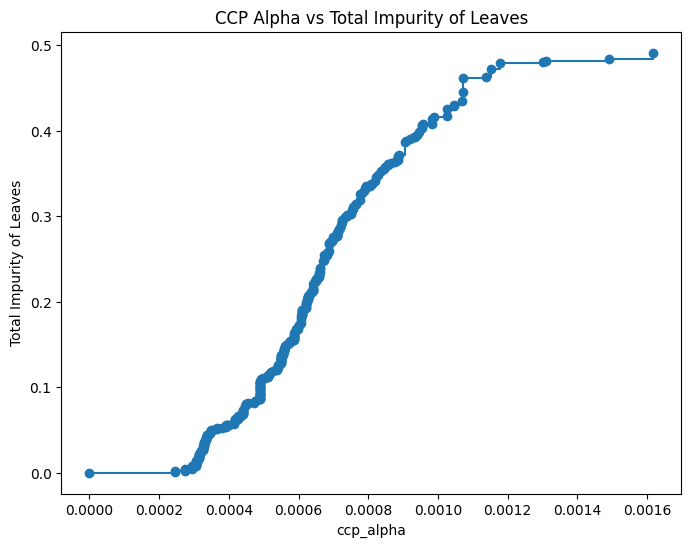

In [27]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
# Get the cost-complexity pruning path
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
# Remove the last alpha
ccp_alphas = ccp_alphas[:-1]
impurities = impurities[:-1]
# Plot alpha vs total leaf impurities
plt.figure(figsize=(8,6))
plt.plot(ccp_alphas, impurities, marker='o', drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("Total Impurity of Leaves")
plt.title("CCP Alpha vs Total Impurity of Leaves")
plt.show()

In [28]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
# Get cost-complexity pruning path
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
# Remove the last element (tree pruned to root)
ccp_alphas = ccp_alphas[:-1]
impurities = impurities[:-1]

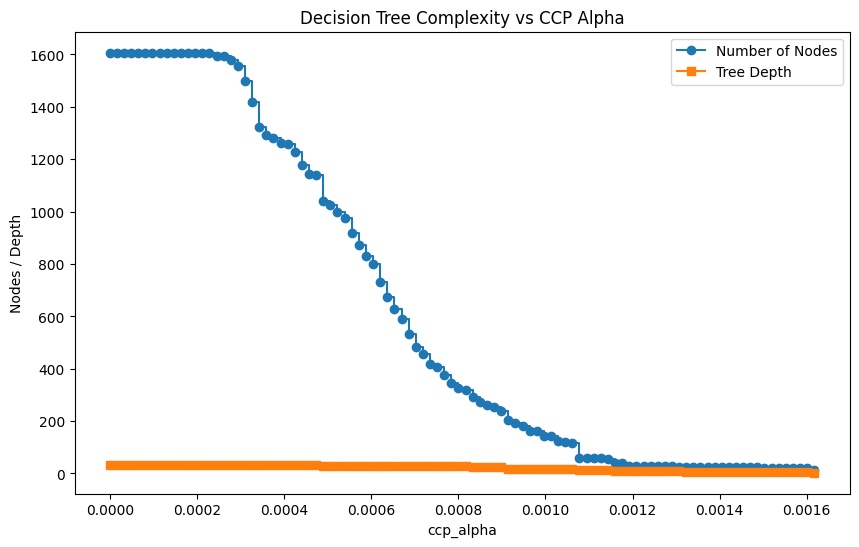

In [29]:
import numpy as np
sampled_alphas = np.linspace(ccp_alphas.min(), ccp_alphas.max(), 100)
clfs = []
for alpha in sampled_alphas:
    dt = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    dt.fit(X_train, y_train)
    clfs.append(dt)
# Collect metrics
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.plot(sampled_alphas, node_counts, marker='o', label="Number of Nodes", drawstyle="steps-post")
ax1.plot(sampled_alphas, depth, marker='s', label="Tree Depth", drawstyle="steps-post")
ax1.set_xlabel("ccp_alpha")
ax1.set_ylabel("Nodes / Depth")
ax1.set_title("Decision Tree Complexity vs CCP Alpha")
ax1.legend()
plt.show()

In [30]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
best_index = np.argmax(test_scores)
best_alpha = sampled_alphas[best_index]
# Train the pruned tree
pruned_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
pruned_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0007678120617202413),
                       random_state=42)

In [31]:
# Training accuracy
train_accuracy = pruned_clf.score(X_train, y_train)
print("Training Accuracy after pruning:", train_accuracy)

# Testing accuracy
test_accuracy = pruned_clf.score(X_test, y_test)
print("Testing Accuracy after pruning:", test_accuracy)


Training Accuracy after pruning: 0.7662147306705753
Testing Accuracy after pruning: 0.5461200585651538


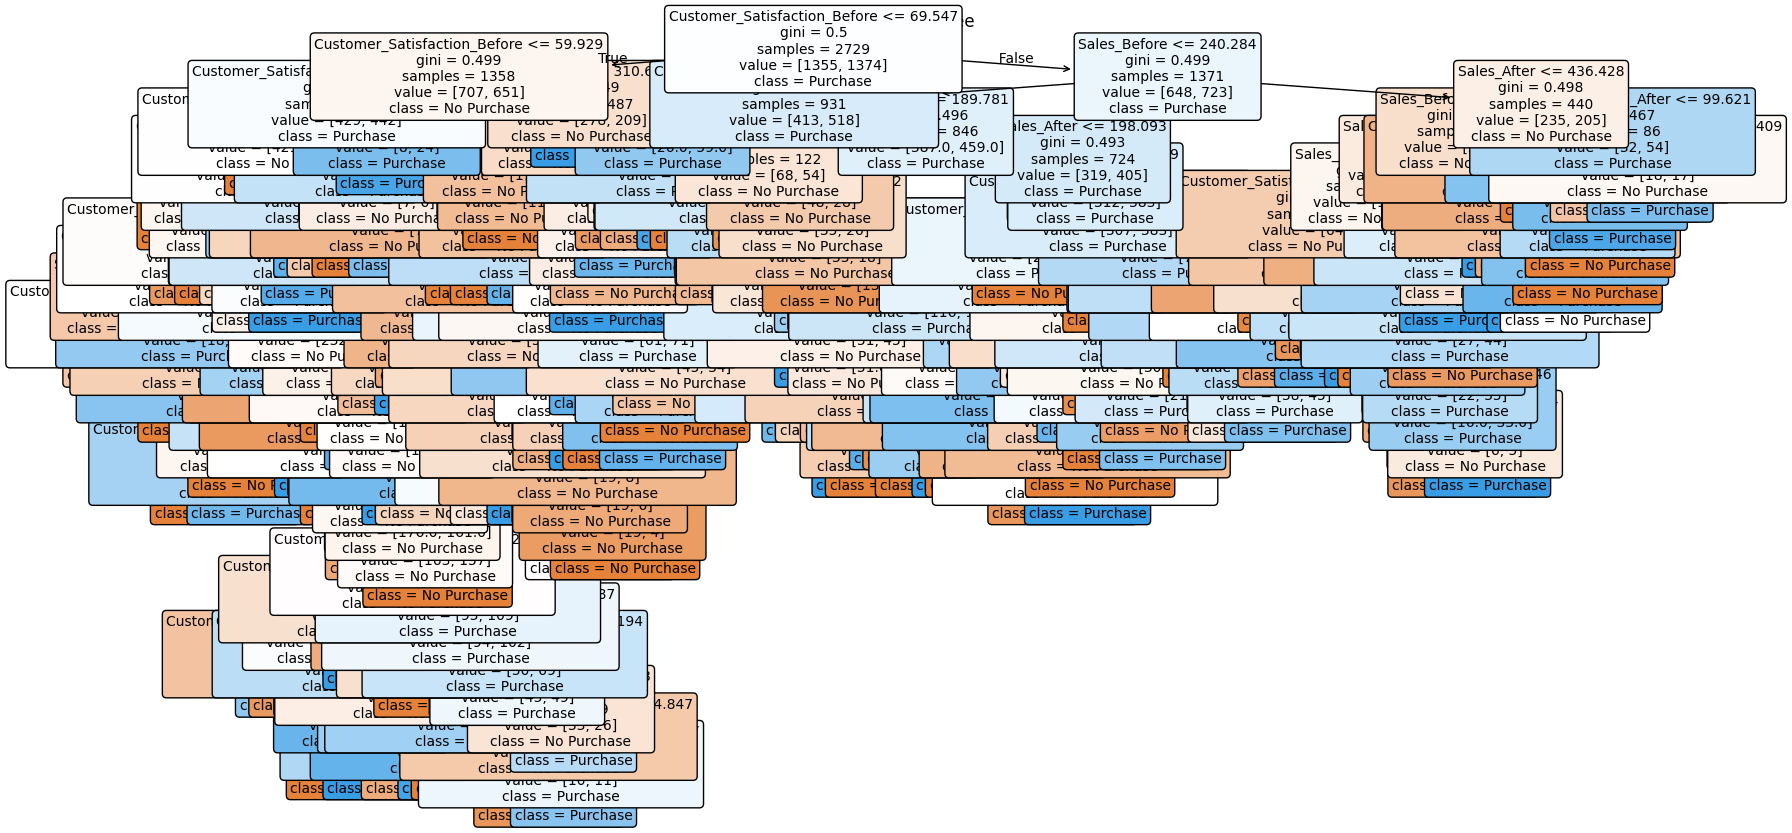

In [32]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(
    pruned_clf,
    feature_names=X.columns,
    class_names=['No Purchase', 'Purchase'],
    filled=True,
    rounded=True,
    fontsize=10)
plt.title("Pruned Decision Tree")
plt.show()
